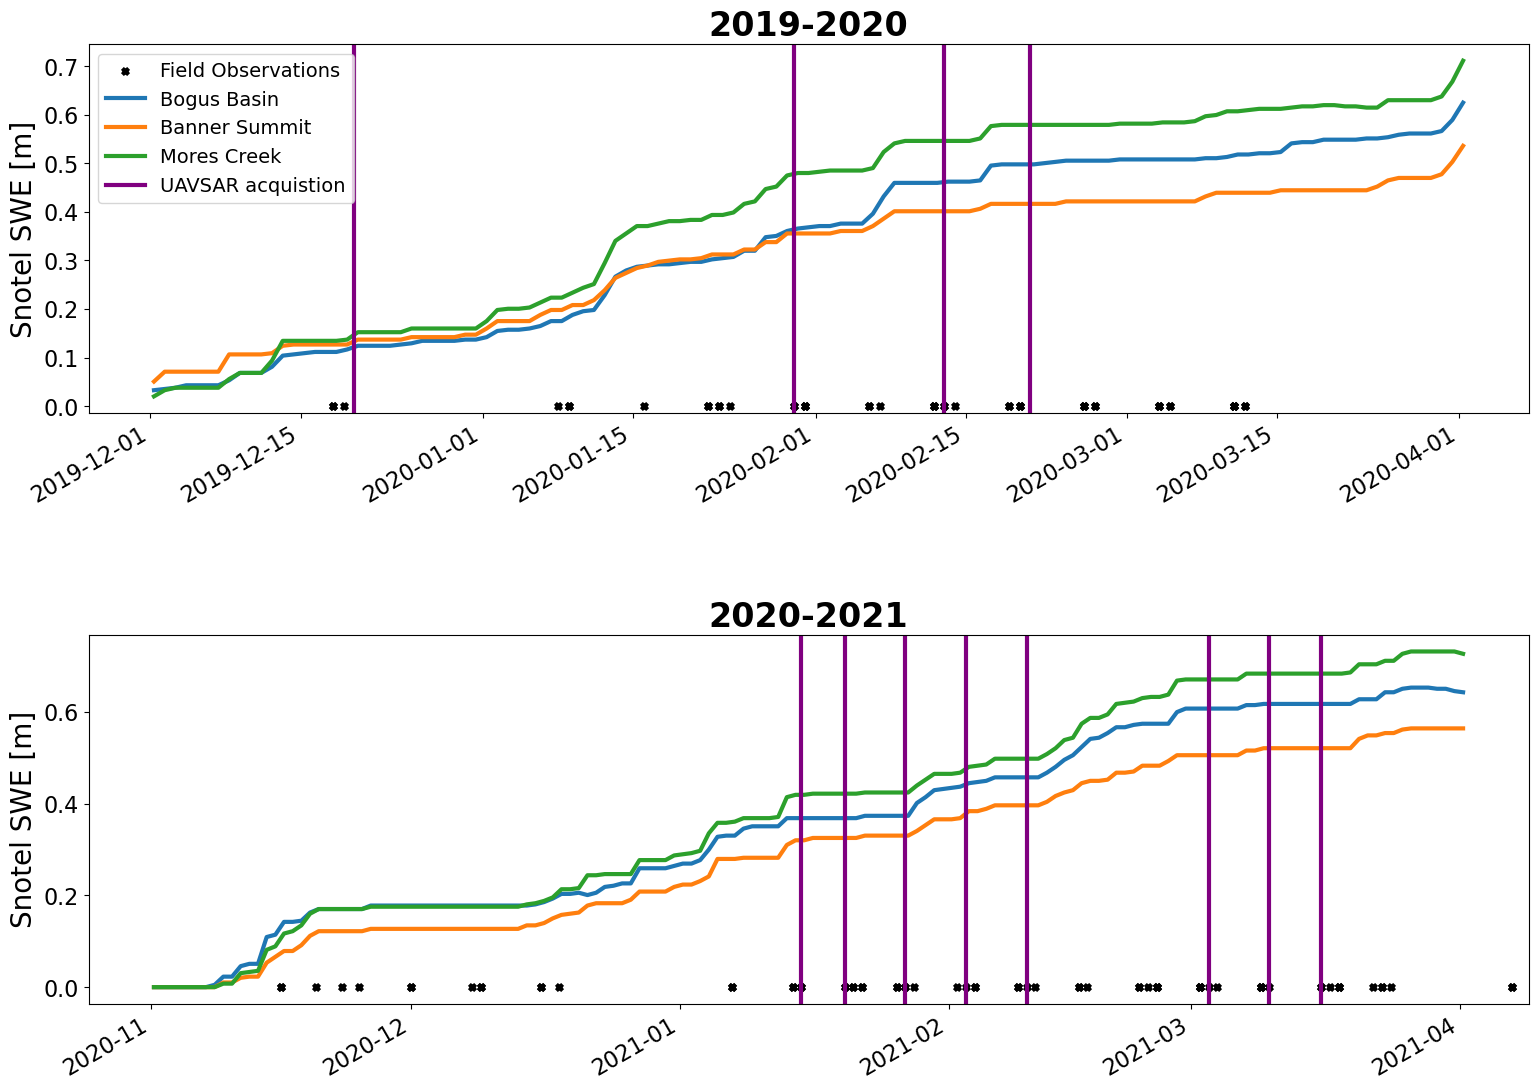

In [3]:
import numpy as np
import pandas as pd
import xarray as xr
import rioxarray as rxa
import matplotlib.pyplot as plt
import pickle

from pathlib import Path

from uavsar_pytools.snow_depth_inversion import phase_from_depth, depth_from_phase

plt.style.use(Path('~/uavsar-validation/manuscript.mplstyle'))

df = pd.read_parquet('/bsuhome/zacharykeskinen/uavsar-validation/data/insitu/snotel.parq')
df = df.reset_index(level= 1)
df = df.sort_index()
df = df[df.site != '550:ID:SNTL']

pits = pd.read_parquet('/bsuhome/zacharykeskinen/uavsar-validation/data/insitu/all_insitu.parq')
pits = pits.loc[pits.datasource != 'NRCS']
pits['plot'] = 0

fig, axes = plt.subplots(2, 1)

pits.reset_index().plot.scatter(x = 'index', y = 'plot', ax = axes[0], color = 'black', marker = 'x', label = 'Field Observations')

for loc in df.site_name.unique():
    if loc == 'bogus':
        name = 'Bogus Basin'
    elif loc == 'banner':
        name = 'Banner Summit'
    elif loc == 'mores':
        name = 'Mores Creek'
    df[df.site_name == loc].loc['2019-11-01':'2020-04-01']['SWE'].plot(label = name, ax = axes[0])
for i, date in enumerate(['2019-12-20', '2020-01-30','2020-02-13','2020-02-21']):
    if i == 0:
        axes[0].axvline(date, color = 'purple', label = 'UAVSAR acquistion')
    else:
        axes[0].axvline(date, color = 'purple')
# axes[0].axvline('2020-02-09', label = 'LiDAR Flight', color = 'red', linestyle = 'dashed')
axes[0].set_title('2019-2020', fontweight = 'bold')
axes[0].legend()
# 2020-2021

pits.reset_index().plot.scatter(x = 'index', y = 'plot', ax = axes[1], color = 'black', marker = 'x')

for loc in df.site_name.unique():
    df[df.site_name == loc].loc['2020-11-01':'2021-04-01']['SWE'].plot(label = loc, ax = axes[1])
for i, date in enumerate(['2021-01-15', '2021-01-20','2021-01-27','2021-02-03','2021-02-10','2021-03-03','2021-03-10','2021-03-16']):
    if i == 0:
        axes[1].axvline(date, color = 'purple', label = 'UAVSAR acquistion')
    else:
        axes[1].axvline(date, color = 'purple')

# plt.axvline('2021-01-15', label = 'Start of UAVSAR', color = 'red')
# axes[1].axvline('2021-03-15', label = 'LiDAR Flight', color = 'red', linestyle = 'dashed')
axes[1].set_title('2020-2021', fontweight = 'bold')

for ax in axes:
    # ax.legend()
    ax.set_ylabel('Snotel SWE [m]')
    ax.set_xlabel('')

plt.tight_layout()
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.6)

plt.savefig('/bsuhome/zacharykeskinen/uavsar-validation/figures/study_area/wx_history_v2.png')